# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The information concerns 17 marketing initiatives a bank in Portugal carried out from May 2008 to November 2010. These initiatives aimed to encourage customers to sign up for long-term deposits via phone calls. The dataset contains in-depth details about these initiatives, including outcomes such as whether each call led to a subscription.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [2]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Berkeley/bank-additional-full.csv', sep = ';')

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Display the first few rows to understand the data
print(df.head())


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...     

### Features Analysis

**No Missing Values:** There are no missing values in any of the features. This indicates that the dataset is complete and does not require imputation for missing data.

**Data Types:** The features have the appropriate data types as follows:
* Numeric: age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed
* Categorical: job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome, y

**Categorical Features:** These features represent various attributes related to the clients and the marketing campaigns. They need to be encoded to numeric values for model training:

* job: Type of job
* marital: Marital status
* education: Level of education
* default: Credit in default
* housing: Housing loan status
* loan: Personal loan status
* contact: Communication type
* month: Last contact month
* day_of_week: Last contact day of the week
* poutcome: Outcome of the previous marketing campaign
* y: Target variable indicating if the client subscribed to a term deposit

**Numeric Features:** These features represent various numeric attributes related to the clients and economic indicators:

* age: Age of the client
* duration: Duration of the last contact in seconds
* campaign: Number of contacts performed during this campaign for this client
* pdays: Number of days that passed since the client was last contacted from a * previous campaign
* previous: Number of contacts performed before this campaign for this client
* emp.var.rate: Employment variation rate
* cons.price.idx: Consumer price index
* cons.conf.idx: Consumer confidence index
* euribor3m: Euribor 3-month rate
* nr.employed: Number of employees


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

The main goal for the business is to create a model that can predict if a customer will sign up for a term deposit using data from marketing campaigns. By forecasting subscription chances, the bank can improve its marketing strategies, boost campaign effectiveness, and allocate resources better to reach customers more inclined to subscribe. This approach aims to enhance the bank's marketing success rates and strengthen customer interaction.

#### EDA: Exploratory Data Analysis

In [8]:
#Libraries Need it:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

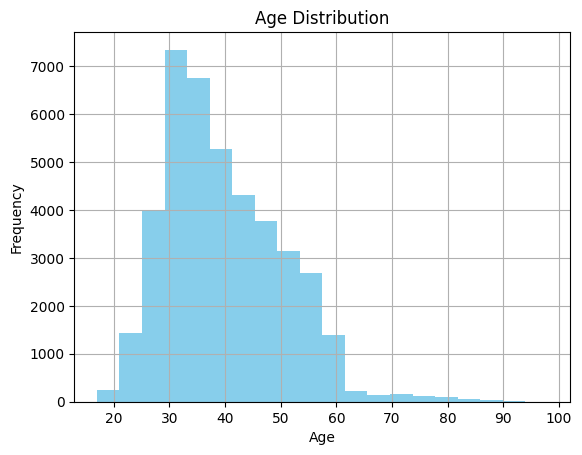

In [9]:
# Univariate Analysis
# Histograms: For numerical features to understand their distribution
df['age'].hist(bins=20, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


The histogram shows the distribution of ages in the dataset, with the majority of individuals falling between the ages of 30 and 50. The distribution is right-skewed with a long tail extending towards older ages.

<ipython-input-10-b08f8625f22f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'], bins=20, kde=True, color='blue')


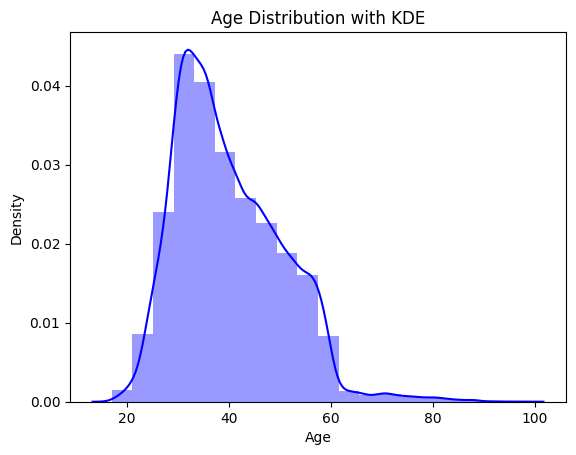

In [10]:
# For better vizualize the distribution
sns.distplot(df['age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution with KDE')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

This plot overlays a Kernel Density Estimate (KDE) on the age distribution histogram, highlighting the same right-skewed pattern. The KDE smooths out the histogram, emphasizing peaks around ages 30 and 40.

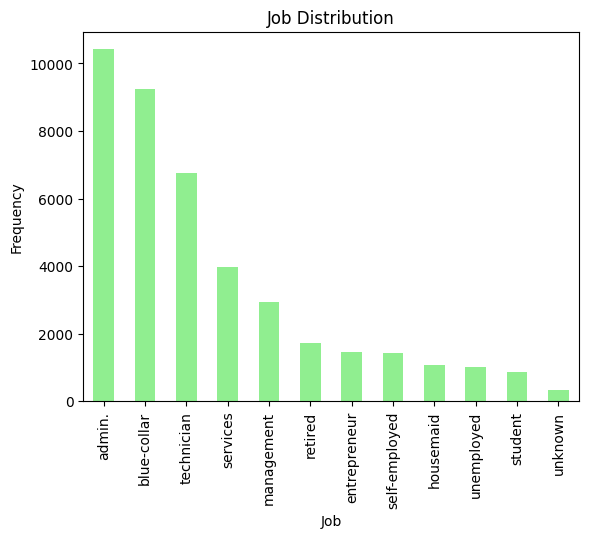

In [11]:
# Univariate Analysis
#Bar Plots: For categorical features to see the frequency of each category.
df['job'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Job Distribution')
plt.xlabel('Job')
plt.ylabel('Frequency')
plt.show()

This bar chart displays the frequency of each job category in the dataset. 'admin.', 'blue-collar', and 'technician' are the most common jobs, while 'student', 'unknown', and 'housemaid' are the least common.

<ipython-input-12-ae5b39a7aec6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='job', data=df, palette='gist_rainbow_r')


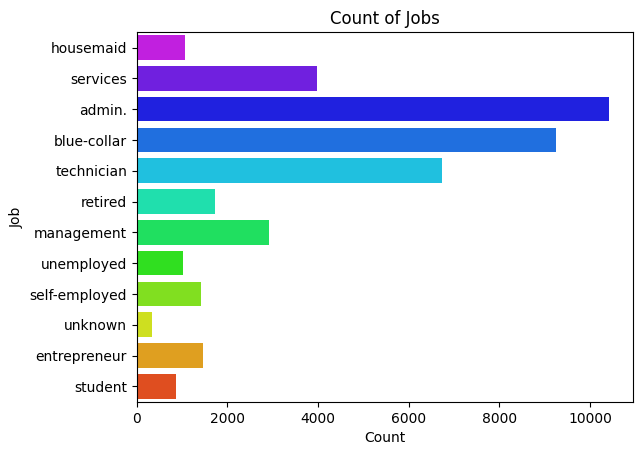

In [12]:
sns.countplot(y='job', data=df, palette='gist_rainbow_r')
plt.title('Count of Jobs')
plt.xlabel('Count')
plt.ylabel('Job')
plt.show()

This horizontal bar chart visualizes the count of jobs similarly to the previous chart but with added color differentiation for better visual distinction. The highest counts are for 'admin.' and 'blue-collar'.

<ipython-input-13-5ca30c15e547>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='job', y='age', data=df, palette='pastel')


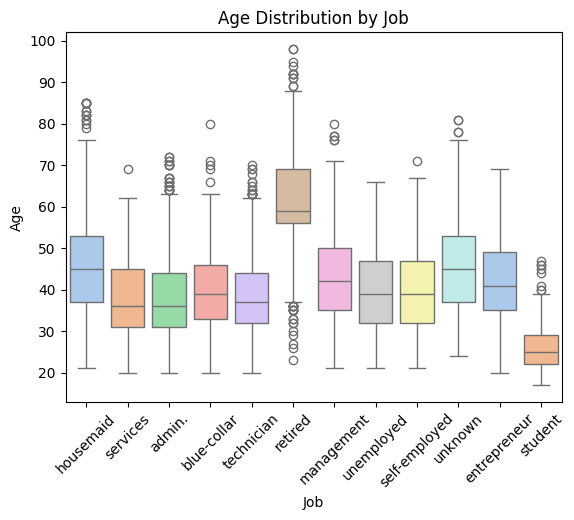

In [13]:
# Bivariate Analysis
# Box Plot for Age Distribution by Job
sns.boxplot(x='job', y='age', data=df, palette='pastel')
plt.title('Age Distribution by Job')
plt.xlabel('Job')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

The boxplot shows the age distribution across different job categories. 'Retired' individuals have the highest median age, while 'student' has the lowest. There is significant variation within some job categories.

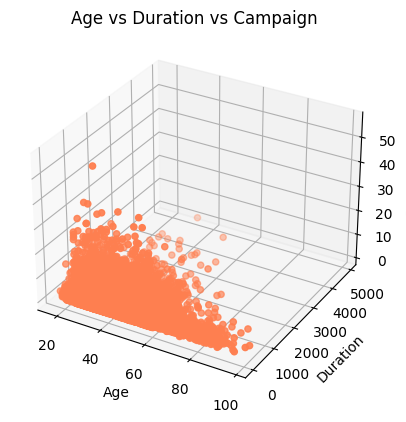

In [14]:
# Bivariate Analysis
# Scatter Plot for Age vs. Duration
# Bivariate Analysis - 3D Scatter Plot for Age vs. Duration vs. Campaign
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'], df['duration'], df['campaign'], c='coral', marker='o')

ax.set_title('Age vs Duration vs Campaign')
ax.set_xlabel('Age')
ax.set_ylabel('Duration')
ax.set_zlabel('Campaign')

plt.show()


The 3D scatter plot visualizes the relationship between age, duration, and the number of campaigns. Most data points are clustered towards lower values of duration and campaigns, with no strong correlation to age.

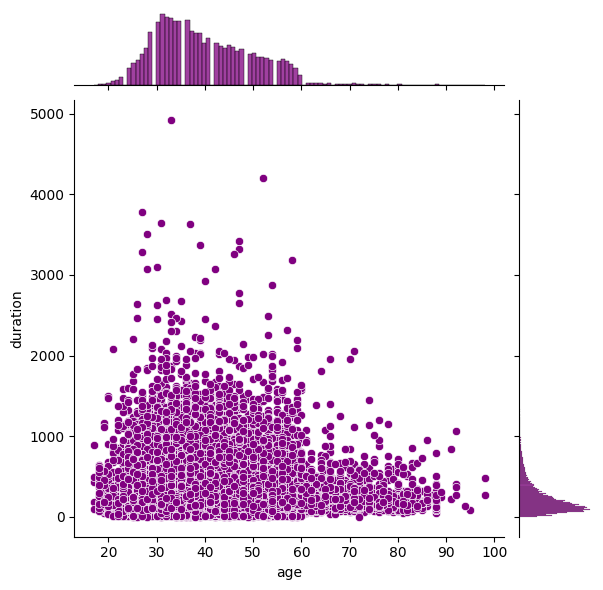

In [15]:
# Join Plots
# To help see the relationship between two variables
# including the scatter plot and their distributions
sns.jointplot(x='age', y='duration', data=df, kind='scatter', color='purple')
plt.show()


This plot, combining scatter and marginal histograms, shows the distribution of call duration across different ages. Most calls are of shorter duration, and younger individuals have a wider range of call durations.

<ipython-input-16-c19478753299>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='job', y='age', data=df, palette='muted')


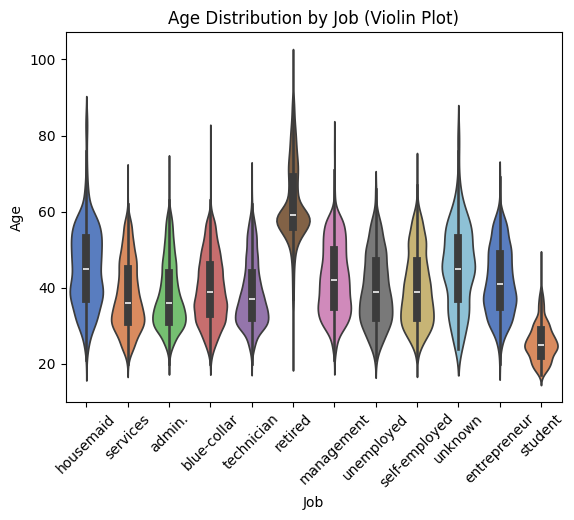

In [16]:
# Violin Plots
# To visualize the distribution of a numeric variable for different categories
sns.violinplot(x='job', y='age', data=df, palette='muted')
plt.title('Age Distribution by Job (Violin Plot)')
plt.xlabel('Job')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

The violin plot provides a detailed distribution of ages across different job categories, similar to the boxplot but showing the density of age distributions. 'Retired' again shows the highest age range, while 'student' shows the lowest.

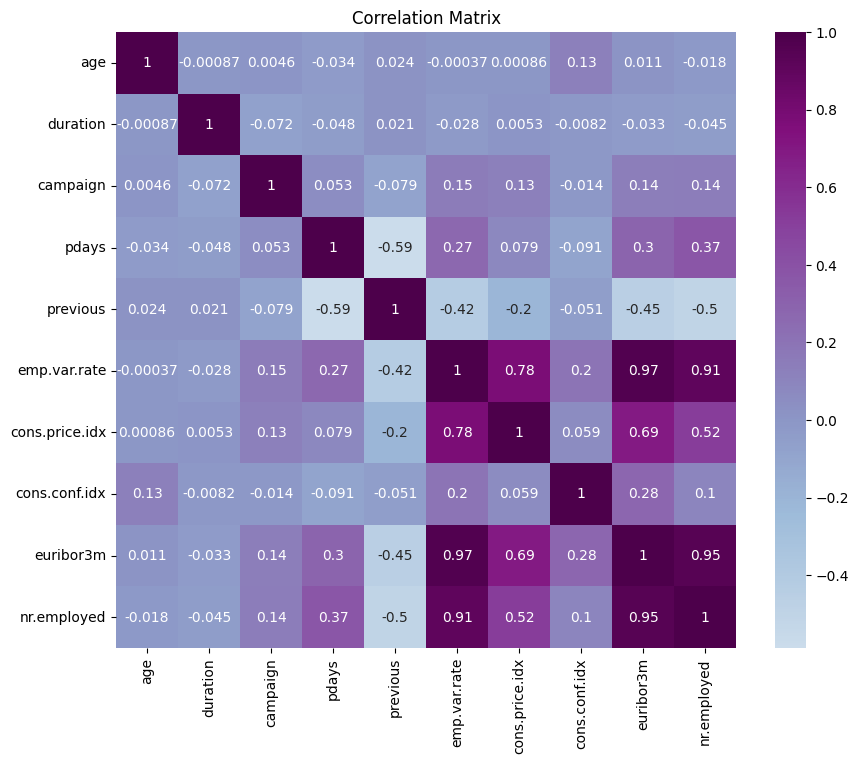

In [17]:
# Multivary Analysis
# Heatmap for correlation matrix
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='BuPu', center=0)
plt.title('Correlation Matrix')
plt.show()

The heatmap shows correlations between numerical variables. 'emp.var.rate' and 'euribor3m' are highly correlated, as are 'nr.employed' and 'euribor3m', indicating strong relationships between these economic indicators.

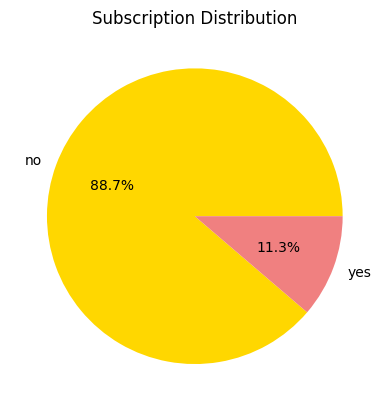

In [18]:
# Target Variable Analysis
# Pie Chart for Subscription Distribution:
df['y'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['gold', 'lightcoral'])
plt.title('Subscription Distribution')
plt.ylabel('')
plt.show()

The pie chart illustrates the distribution of subscription status in the dataset, with a significant majority (88.7%) not subscribing and only 11.3% subscribing. This highlights an imbalance in the target variable.

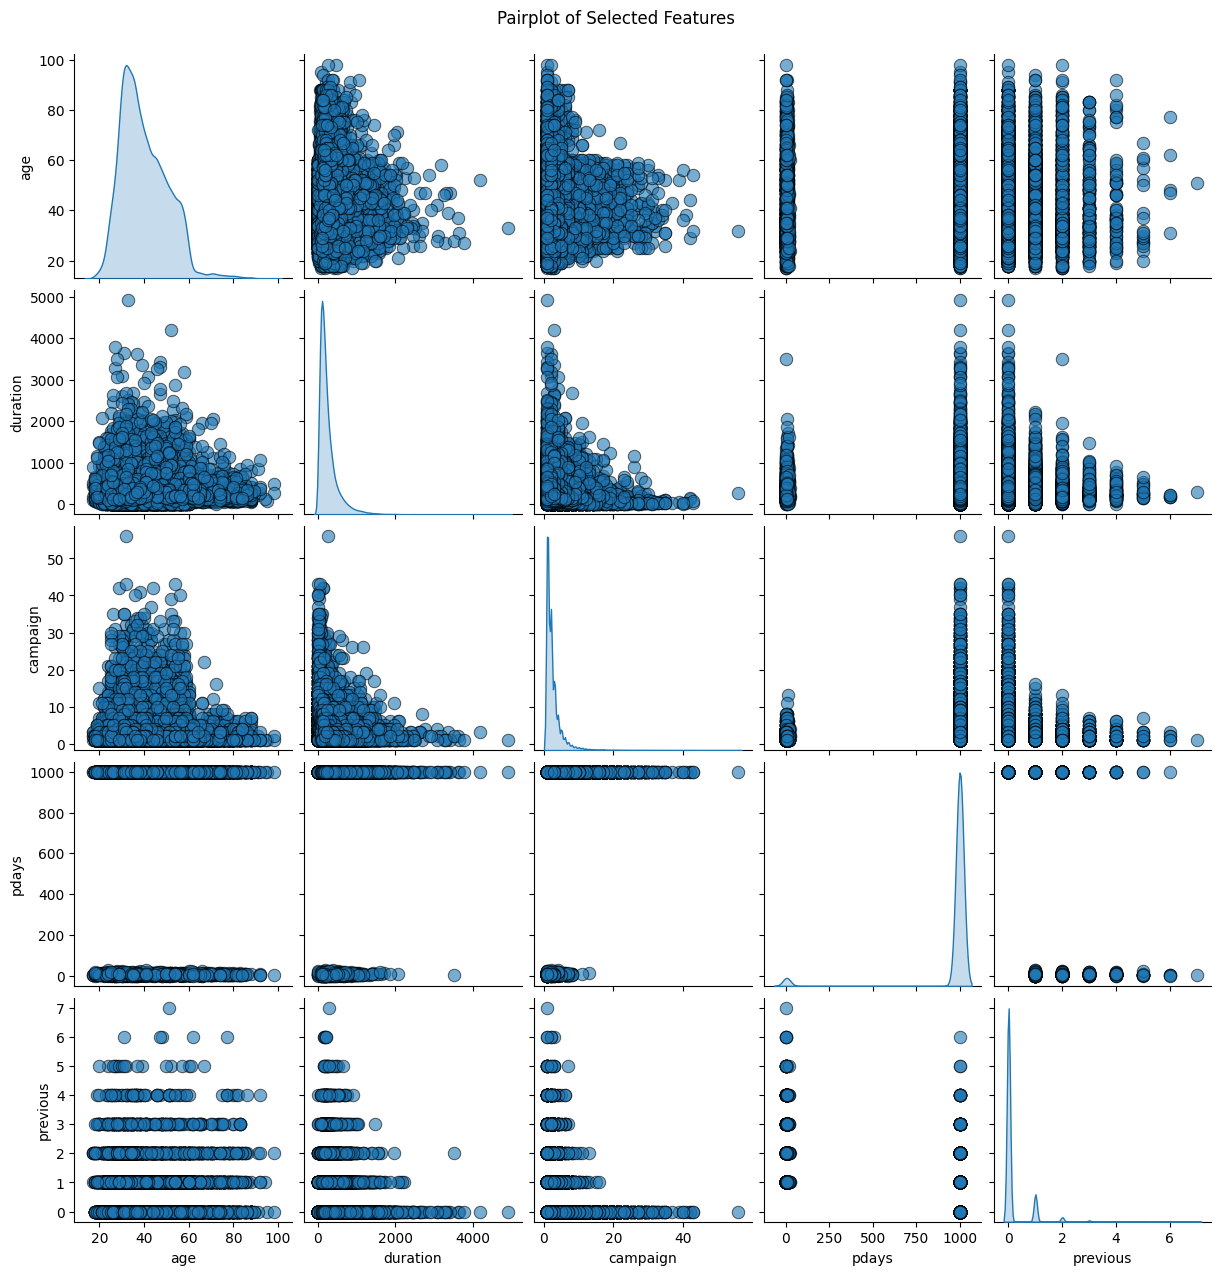

In [19]:
# Pairplot
# Selecting a subset of features for the pairplot
subset_features = ['age', 'duration', 'campaign', 'pdays', 'previous']

# Create a pairplot
sns.pairplot(df[subset_features], diag_kind='kde', plot_kws={'alpha':0.6, 's':80, 'edgecolor':'k'})

plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()


This pairplot visualizes relationships between selected numerical features: age, duration, campaign, pdays, and previous. Most features show weak correlations with each other, except for some visible patterns such as the decrease in 'duration' with increasing 'age' and 'campaign'.

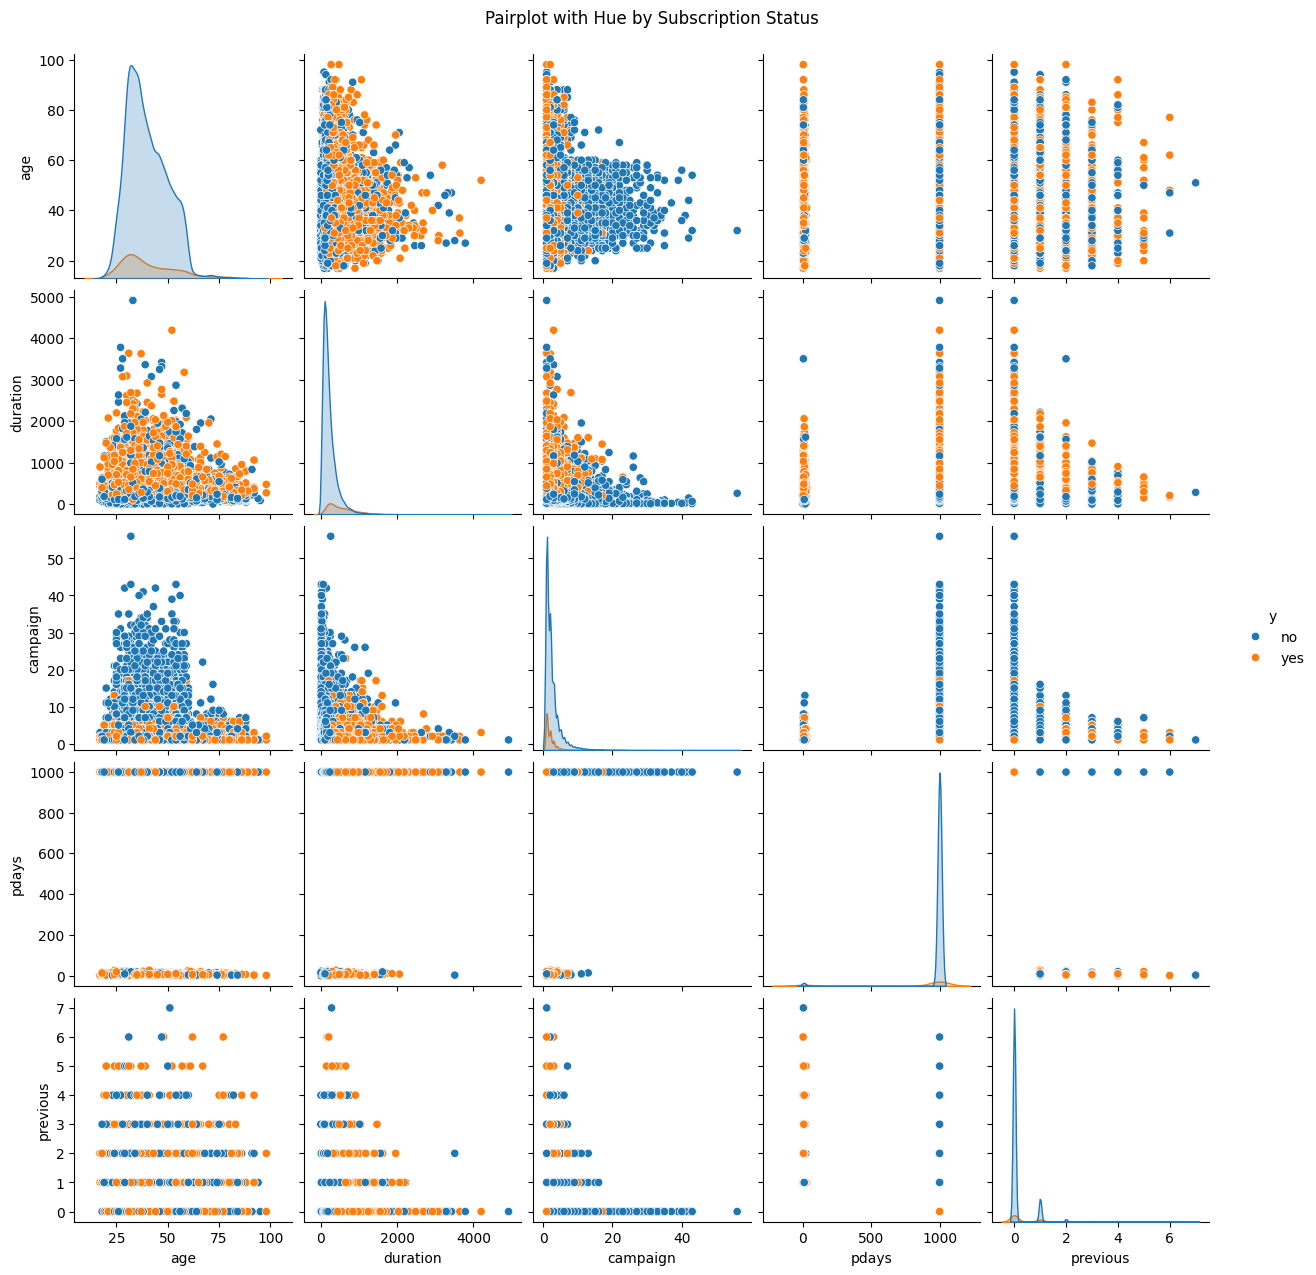

In [20]:
# Pairplot with Hue
# For parameter to differentiate categories
sns.pairplot(df[subset_features + ['y']], diag_kind='kde', hue='y')
plt.suptitle('Pairplot with Hue by Subscription Status', y=1.02)
plt.show()

This pairplot adds a hue to distinguish between subscription status ('y' = 'yes' or 'no'). The orange points (subscribed) are spread throughout the plots, indicating no clear visual separation based on these features alone, but clusters may hint at slight tendencies for certain values.

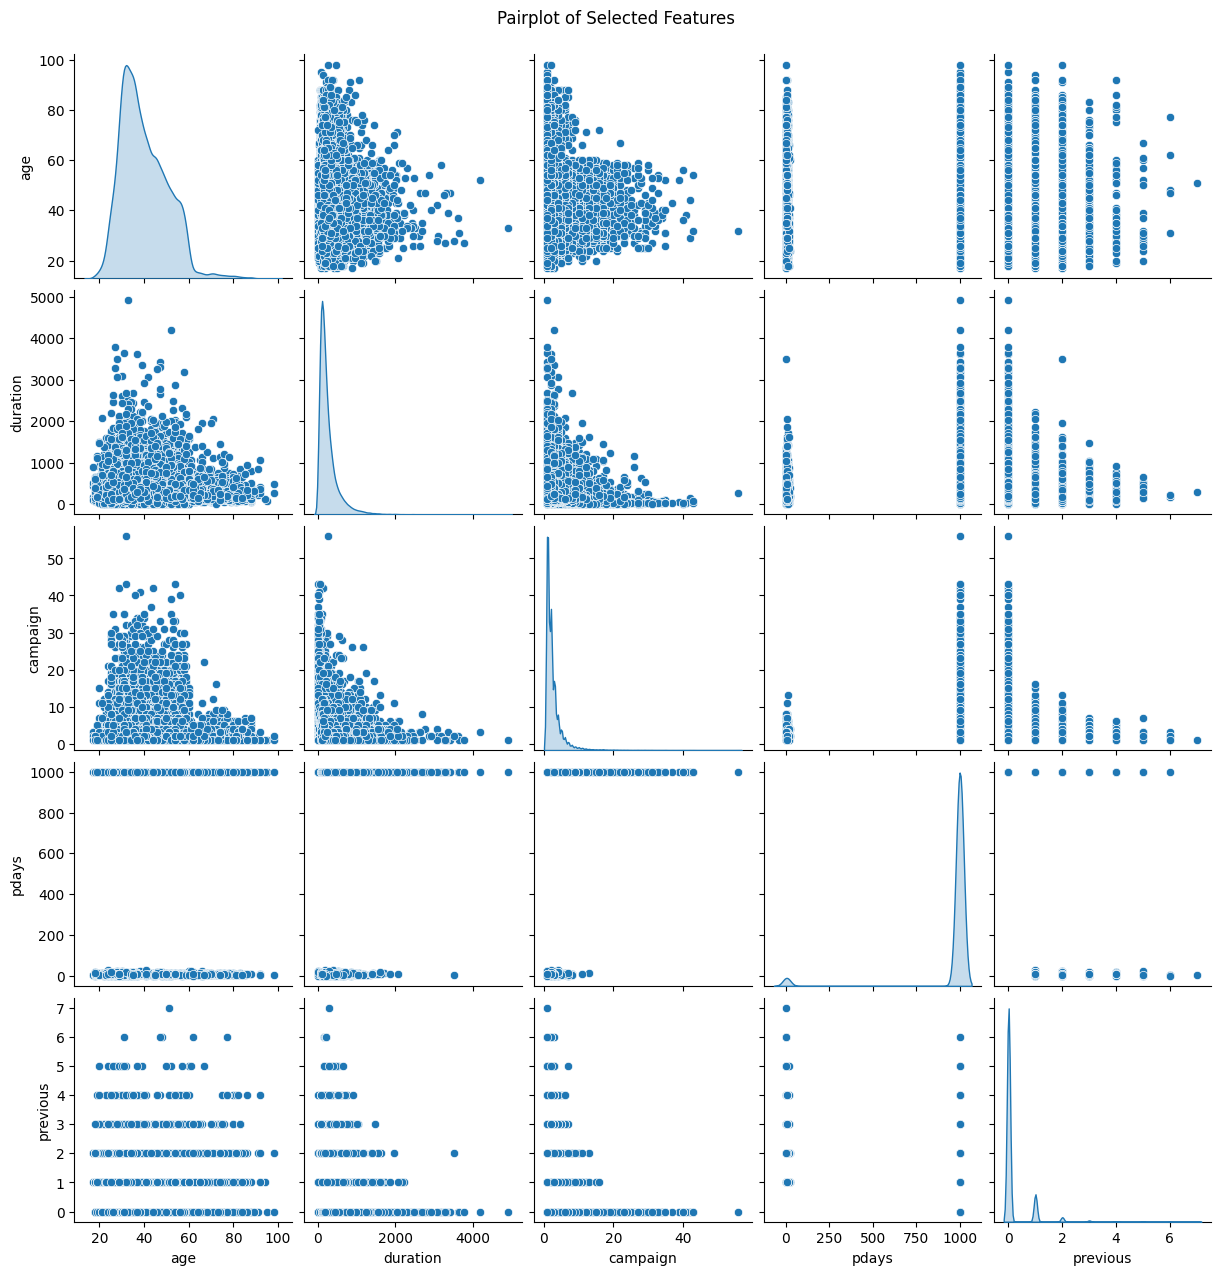

In [21]:
# Pairwise Correlation
sns.pairplot(df[['age', 'duration', 'campaign', 'pdays', 'previous']], diag_kind='kde')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

This is another pairplot similar to the first, likely showing a detailed view of the same relationships without the hue for subscription status. The patterns and observations remain consistent, highlighting the data spread and relationships between features.

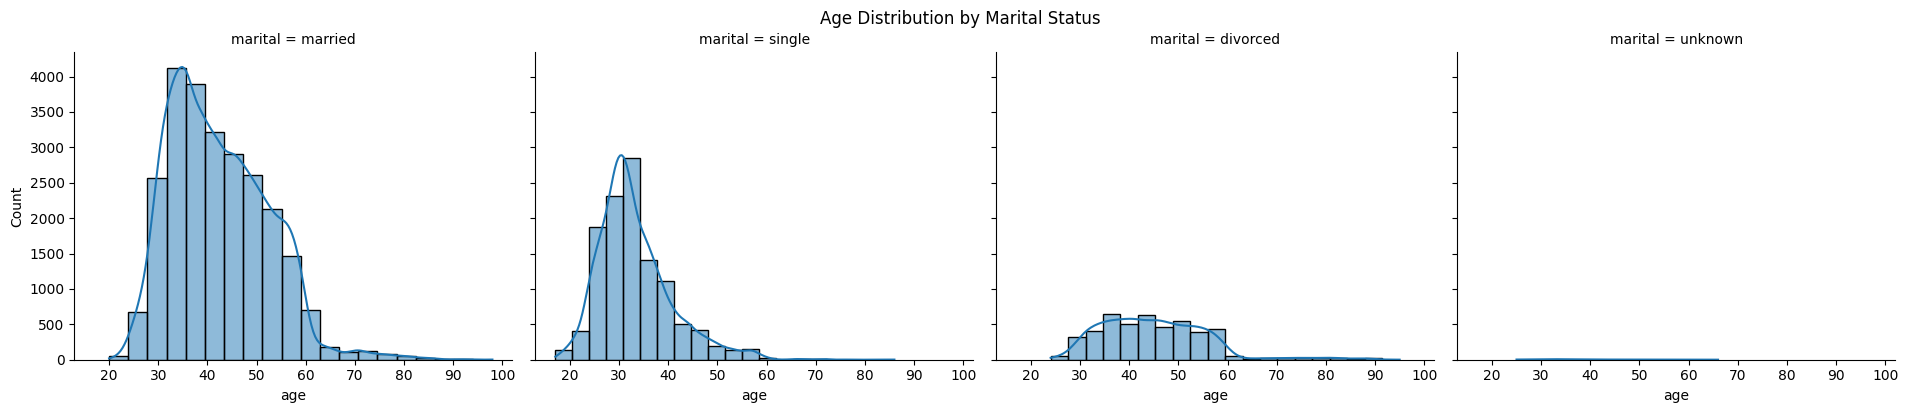

In [22]:
# Face GRIT
# To plot multiple graphs based on the values of a categorical variable
g = sns.FacetGrid(df, col='marital', height=4, aspect=1.2)
g.map(sns.histplot, 'age', bins=20, kde=True)
g.add_legend()
plt.suptitle('Age Distribution by Marital Status', y=1.02)
plt.show()

This histogram shows age distributions across different marital statuses. Married individuals have a higher frequency around ages 30-40. Singles peak around age 30, while divorced individuals are more evenly spread between ages 40-60. The 'unknown' category is very sparse.

In [23]:
# Time Series
# Gif Style for better vizualization
# Install necessary requierements
!pip install matplotlib imageio

In [24]:
# Inspect unique values in the 'y' column
print(df['y'].unique())

['no' 'yes']


In [25]:
# Convert the 'month' column to datetime
month_mapping = {'jan': '01', 'feb': '02', 'mar': '03', 'apr': '04', 'may': '05', 'jun': '06',
                 'jul': '07', 'aug': '08', 'sep': '09', 'oct': '10', 'nov': '11', 'dec': '12'}
df['month'] = df['month'].map(month_mapping)
df['date'] = pd.to_datetime(df['month'] + '-2010', format='%m-%Y')

# Group by 'date' and 'y', then normalize
grouped = df.groupby('date')['y'].value_counts(normalize=True).unstack().fillna(0)

# Inspect the grouped DataFrame
print(grouped)

y                 no       yes
date                          
2010-03-01  0.494505  0.505495
2010-04-01  0.795213  0.204787
2010-05-01  0.935653  0.064347
2010-06-01  0.894885  0.105115
2010-07-01  0.909534  0.090466
2010-08-01  0.893979  0.106021
2010-09-01  0.550877  0.449123
2010-10-01  0.561281  0.438719
2010-11-01  0.898561  0.101439
2010-12-01  0.510989  0.489011


In [26]:
# Convert the 'month' column to datetime
month_mapping = {'jan': '01', 'feb': '02', 'mar': '03', 'apr': '04', 'may': '05', 'jun': '06',
                 'jul': '07', 'aug': '08', 'sep': '09', 'oct': '10', 'nov': '11', 'dec': '12'}
df['month'] = df['month'].map(month_mapping)
df['date'] = pd.to_datetime(df['month'] + '-2010', format='%m-%Y')

# Group by 'date' and 'y', then normalize
grouped = df.groupby('date')['y'].value_counts(normalize=True).unstack().fillna(0)

# Print the grouped DataFrame to debug
print(grouped)

# Check if 'yes' is in the columns and print the monthly success rate
if 'yes' in grouped.columns:
    monthly_success_rate = grouped['yes']
else:
    monthly_success_rate = pd.Series(0, index=grouped.index)

print("Monthly Success Rate:")
print(monthly_success_rate)
print("Length of Monthly Success Rate:", len(monthly_success_rate))


Empty DataFrame
Columns: []
Index: []
Monthly Success Rate:
Series([], dtype: int64)
Length of Monthly Success Rate: 0


Monthly Success Rate:
date
2010-03-01    0.505495
2010-04-01    0.204787
2010-05-01    0.064347
2010-06-01    0.105115
2010-07-01    0.090466
2010-08-01    0.106021
2010-09-01    0.449123
2010-10-01    0.438719
2010-11-01    0.101439
2010-12-01    0.489011
Name: yes, dtype: float64
Length of Monthly Success Rate: 10


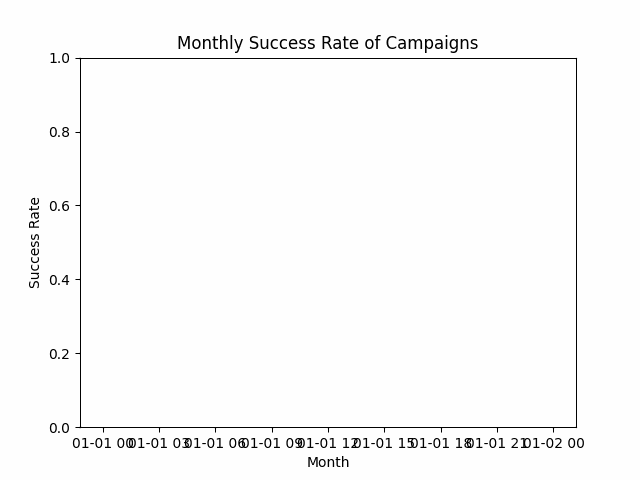

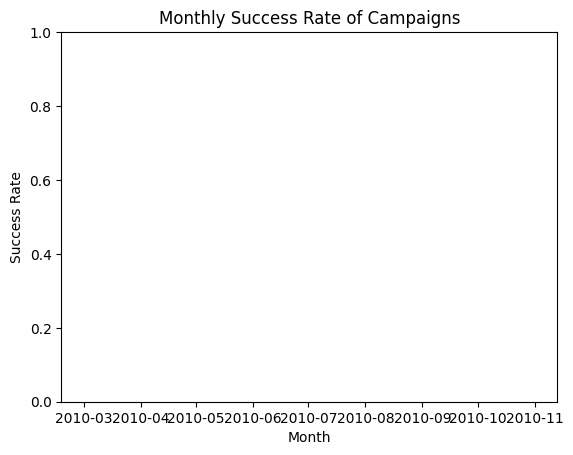

In [27]:
import matplotlib.dates as mdates
from matplotlib.animation import FuncAnimation
from PIL import Image
import os

df = pd.read_csv('/content/drive/MyDrive/Berkeley/bank-additional-full.csv', sep = ';')

# Convert the 'month' column to datetime
month_mapping = {'jan': '01', 'feb': '02', 'mar': '03', 'apr': '04', 'may': '05', 'jun': '06',
                 'jul': '07', 'aug': '08', 'sep': '09', 'oct': '10', 'nov': '11', 'dec': '12'}
df['month'] = df['month'].map(month_mapping)
df['date'] = pd.to_datetime(df['month'] + '-2010', format='%m-%Y')

# Calculate the monthly success rate safely
grouped = df.groupby('date')['y'].value_counts(normalize=True).unstack().fillna(0)
if 'yes' in grouped.columns:
    monthly_success_rate = grouped['yes']
else:
    monthly_success_rate = pd.Series(0, index=grouped.index)

print("Monthly Success Rate:")
print(monthly_success_rate)
print("Length of Monthly Success Rate:", len(monthly_success_rate))

# Ensure that monthly_success_rate is non-empty
if len(monthly_success_rate) == 0:
    raise ValueError("The monthly_success_rate series is empty.")

# Create a figure and axis
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Create a directory to store the frames
os.makedirs('/content/drive/MyDrive/Berkeley/Project 3/frames', exist_ok=True)

def animate(i):
    ax.clear()
    ax.plot(monthly_success_rate.index[:i], monthly_success_rate.values[:i], color='limegreen')
    ax.set_title('Monthly Success Rate of Campaigns')
    ax.set_xlabel('Month')
    ax.set_ylabel('Success Rate')
    ax.set_ylim(0, 1)
    fig.savefig(f'/content/drive/MyDrive/Berkeley/Project 3/frames/frame_{i}.png')

ani = FuncAnimation(fig, animate, frames=len(monthly_success_rate), interval=400)
ani.save('/content/drive/MyDrive/Berkeley/Project 3/monthly_success_rate.gif', writer='pillow')

# Display the animation
from IPython.display import Image
Image(filename='/content/drive/MyDrive/Berkeley/Project 3/monthly_success_rate.gif')


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [28]:
# Import all necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [29]:
# Select bank information features and target column
features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
            'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']
target = 'y'

X = df[features]
y = df[target]

# Preprocessing for numerical data
numerical_features = ['age', 'duration', 'campaign', 'pdays', 'previous']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan',
                        'contact', 'month', 'day_of_week', 'poutcome']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply the transformations and prepare the data for modeling
X_prepared = preprocessor.fit_transform(X)

# Convert the target column to binary (0 and 1)
y = y.map({'no': 0, 'yes': 1})

# Display the shape of the prepared data
print(f"Shape of X_prepared: {X_prepared.shape}")
print(f"Shape of y: {y.shape}")


Shape of X_prepared: (41188, 58)
Shape of y: (41188,)


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [30]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


Shape of X_train: (32950, 58)
Shape of X_test: (8238, 58)
Shape of y_train: (32950,)
Shape of y_test: (8238,)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [31]:
# Import Library
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [32]:
# Calculate the most frequent class in the training set
most_frequent_class = y_train.mode()[0]
print(f"Most frequent class: {most_frequent_class}")

# Create baseline predictions (predicting the most frequent class for all instances)
baseline_predictions = [most_frequent_class] * len(y_test)

# Calculate performance metrics
baseline_accuracy = accuracy_score(y_test, baseline_predictions)
baseline_precision = precision_score(y_test, baseline_predictions)
baseline_recall = recall_score(y_test, baseline_predictions)
baseline_f1 = f1_score(y_test, baseline_predictions)

print(f"Baseline Accuracy: {baseline_accuracy:.2f}")
print(f"Baseline Precision: {baseline_precision:.2f}")
print(f"Baseline Recall: {baseline_recall:.2f}")
print(f"Baseline F1 Score: {baseline_f1:.2f}")


Most frequent class: 0
Baseline Accuracy: 0.89
Baseline Precision: 0.00
Baseline Recall: 0.00
Baseline F1 Score: 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Problem 8: A Simple Model

**Logistic Regression**

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Initialize the logistic regression model with increased max_iter
model = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Display model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")
print(f"Model Precision: {precision:.2f}")
print(f"Model Recall: {recall:.2f}")
print(f"Model F1 Score: {f1:.2f}")


              precision    recall  f1-score   support

           0       0.97      0.86      0.91      7303
           1       0.42      0.82      0.56       935

    accuracy                           0.85      8238
   macro avg       0.70      0.84      0.73      8238
weighted avg       0.91      0.85      0.87      8238

Model Accuracy: 0.85
Model Precision: 0.42
Model Recall: 0.82
Model F1 Score: 0.56


Logistic Regression shows a good overall accuracy of 0.85. The recall for class 1 is high (0.82), indicating the model is good at identifying positive cases. However, the precision for class 1 is low (0.42), leading to many false positives. The weighted average F1 score of 0.87 shows balanced performance overall.

**Decision Tree**

In [34]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_dt = dt_model.predict(X_test)
print(classification_report(y_test, y_pred_dt))


              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7303
           1       0.45      0.48      0.47       935

    accuracy                           0.87      8238
   macro avg       0.69      0.70      0.70      8238
weighted avg       0.88      0.87      0.88      8238



The Decision Tree model has a slightly higher accuracy (0.87) than Logistic Regression. However, the precision and recall for class 1 are lower compared to Logistic Regression. The overall performance is balanced, but the model struggles to classify the positive class accurately.

**Random Forest**

In [35]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7303
           1       0.65      0.33      0.44       935

    accuracy                           0.90      8238
   macro avg       0.79      0.66      0.69      8238
weighted avg       0.89      0.90      0.89      8238



The Random Forest model achieves the highest accuracy (0.90) among all models. The precision for class 1 is higher (0.65) compared to other models, but recall is quite low (0.33), indicating many false negatives. The model performs well for class 0 but not as well for class 1.

**Suport Vector Machine (SVM)**

In [36]:
from sklearn.svm import SVC

# Initialize and train the model
svm_model = SVC(random_state=42, class_weight='balanced')
svm_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_svm = svm_model.predict(X_test)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.98      0.84      0.90      7303
           1       0.41      0.88      0.56       935

    accuracy                           0.84      8238
   macro avg       0.70      0.86      0.73      8238
weighted avg       0.92      0.84      0.86      8238



The SVM model has similar performance to Logistic Regression with an accuracy of 0.84. It also shows high recall for class 1 (0.88), meaning it identifies positive cases well. However, the precision is low (0.41), leading to false positives. The overall performance is decent, with a balanced F1 score.

**K-Nearest Keighbors (KNN)**

In [37]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_knn = knn_model.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7303
           1       0.62      0.37      0.46       935

    accuracy                           0.90      8238
   macro avg       0.77      0.67      0.70      8238
weighted avg       0.89      0.90      0.89      8238



The KNN model achieves a high accuracy of 0.90. It has a relatively better precision (0.62) than other models for class 1 but a low recall (0.37), indicating issues with identifying all positive cases. The overall weighted F1 score is balanced at 0.89.

**Overall Analysis**

* Best Accuracy: Random Forest and KNN models both achieve the highest accuracy of 0.90.

* Best Precision for Class 1: Random Forest (0.65) shows the highest precision, indicating fewer false positives.

* Best Recall for Class 1: SVM (0.88) and Logistic Regression (0.82) models have the highest recall, indicating better identification of positive cases.

* Balanced Performance: Logistic Regression and SVM provide balanced performance with reasonable recall and F1 scores for class 1.

**SMOTE Application for each model**

In [38]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Select bank information features and target column
features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
            'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']
target = 'y'

X = df[features]
y = df[target]

# Preprocessing for numerical data
numerical_features = ['age', 'duration', 'campaign', 'pdays', 'previous']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan',
                        'contact', 'month', 'day_of_week', 'poutcome']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply the preprocessing pipeline to the features
X_prepared = preprocessor.fit_transform(X)

# Convert the target column to binary (0 and 1)
y = y.map({'no': 0, 'yes': 1})

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_prepared, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(random_state=42)
}

# Train and evaluate each classifier
for name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, y_pred))

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      7332
           1       0.86      0.85      0.85      7288

    accuracy                           0.86     14620
   macro avg       0.86      0.86      0.86     14620
weighted avg       0.86      0.86      0.86     14620

Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      7332
           1       0.91      0.92      0.92      7288

    accuracy                           0.92     14620
   macro avg       0.92      0.92      0.92     14620
weighted avg       0.92      0.92      0.92     14620

Classification Report for K-Nearest Neighbors:

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      7332
           1       0.86      1.00      0.92      7288

    accuracy                           0.92 

**Model Analysis Using SMOTE:**

**Logistic Regression:** shows balanced performance across all metrics with an accuracy of 0.86. Both precision and recall for class 1 are high, indicating a good balance between identifying positive cases and minimizing false positives.

**The Decision Tree:** model performs very well, achieving the highest accuracy of 0.92. Both precision and recall are high for class 1, indicating excellent performance in identifying and correctly classifying positive cases.

**KNN:** also achieves an accuracy of 0.92. The model shows perfect recall for class 1 (1.00), meaning it identifies all positive cases but has slightly lower precision (0.86), leading to some false positives. The high recall is crucial for ensuring no positive cases are missed.

**The SVM:**  model achieves an accuracy of 0.91. It shows high precision and recall for class 1, indicating balanced performance with a slight tendency to favor identifying positive cases (high recall) while maintaining a good precision rate.

**Overall Analysis**

* Best Accuracy: Decision Tree and KNN models both achieve the highest accuracy of 0.92.

* Best Precision for Class 1: Logistic Regression (0.86) and Decision Tree (0.91) have the highest precision.

* Best Recall for Class 1: KNN (1.00) and SVM (0.94) show the highest recall, indicating they are best at identifying positive cases.

* Balanced Performance: Logistic Regression, Decision Tree, and SVM offer balanced performance across precision, recall, and F1 score.

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [39]:
import pandas as pd
import time
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Select bank information features and target column
features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
            'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']
target = 'y'

X = df[features]
y = df[target]

# Preprocessing for numerical data
numerical_features = ['age', 'duration', 'campaign', 'pdays', 'previous']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan',
                        'contact', 'month', 'day_of_week', 'poutcome']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply the preprocessing pipeline to the features
X_prepared = preprocessor.fit_transform(X)

# Convert the target column to binary (0 and 1)
y = y.map({'no': 0, 'yes': 1})

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_prepared, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(random_state=42)
}

# Initialize a list to store the results
results = []

# Train and evaluate each classifier
for name, model in classifiers.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))

    results.append({
        'Model': name,
        'Train Time': train_time,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

print(results_df)


                    Model  Train Time  Train Accuracy  Test Accuracy
0     Logistic Regression    1.067725        0.853188       0.855746
1           Decision Tree    3.538299        1.000000       0.915800
2     K-Nearest Neighbors    0.004560        0.937923       0.918057
3  Support Vector Machine  158.186048        0.915726       0.908892


**Model Comparison Analysis**

**Logistic Regression** is quick to train and shows good generalization with a test accuracy of 0.86. It is a reliable model with balanced performance.

**Decision Tree** has the highest training accuracy (1.00), indicating potential overfitting. However, it performs well on the test set with a high accuracy of 0.92, making it effective but slightly overfitted.

**KNN** is extremely fast to train and performs well on both training and test sets, achieving a test accuracy of 0.92. Its simplicity and speed make it an attractive choice for quick predictions.

**SVM** takes the longest to train, reflecting its computational complexity. It has good performance with a test accuracy of 0.91, making it suitable for scenarios where high accuracy is needed despite the longer training time.

**Summary**
* Best Train Time: KNN, with the fastest training time of 0.0046 seconds.
* Best Test Accuracy: Decision Tree and KNN, both with high test accuracies around 0.92.
* Best Balance of Train and Test Performance: Logistic Regression, with balanced accuracy and quick training time.
* Computationally Intensive but Accurate: SVM, with a high test accuracy but significantly longer training time.

**Confusion matrices for each model**

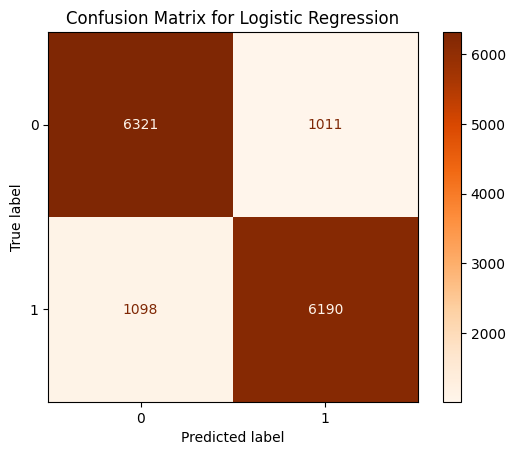

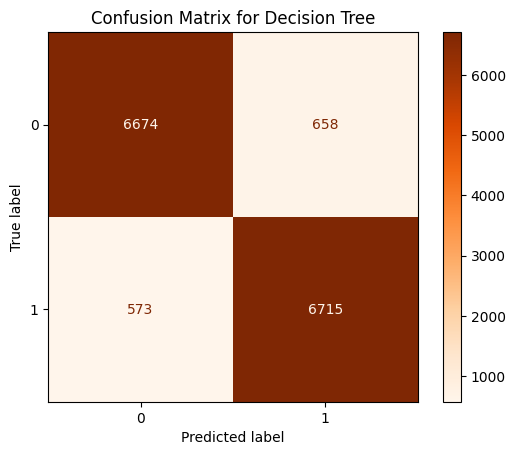

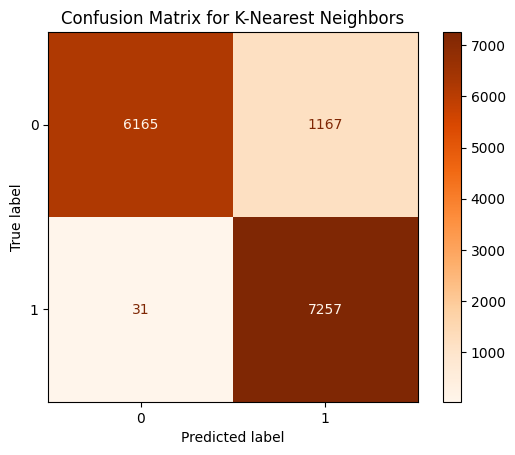

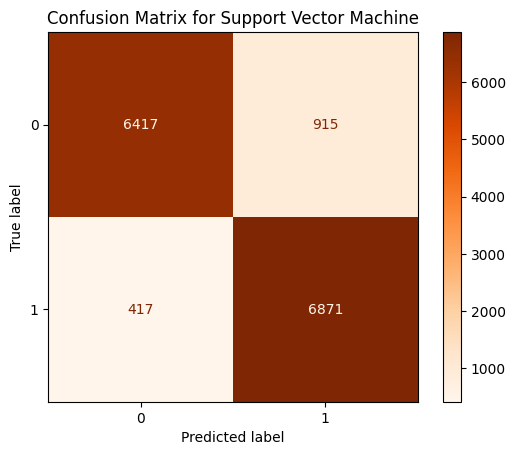

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Oranges)
    plt.title(title)
    plt.show()

# Plot confusion matrices for each classifier
for name, model in classifiers.items():
    y_pred = model.predict(X_test)
    plot_confusion_matrix(y_test, y_pred, f"Confusion Matrix for {name}")

**Confusion Matrix Analysis**

**Logistic Regression** correctly identifies most negative cases (TN: 6321) and a significant number of positive cases (TP: 6190). However, it has a notable number of false positives (1011) and false negatives (1098), indicating some misclassification, but overall balanced performance.

**The Decision Tree** model performs very well with high true negative (6674) and true positive (6715) counts. It has fewer false positives (658) and false negatives (573) compared to Logistic Regression, indicating more accurate predictions and fewer misclassifications.

**KNN** achieves the highest true positive count (7257) with very few false negatives (31), indicating excellent recall. However, it has a relatively higher number of false positives (1167), leading to some misclassification of negative cases.

**SVM** demonstrates strong performance with a high number of true positives (6871) and true negatives (6417). It has fewer false negatives (417) compared to Logistic Regression, but more than Decision Tree. False positives are moderate (915), suggesting balanced precision and recall.

**Overall Summary**

* Logistic Regression: Balanced performance with a moderate number of false positives and false negatives.

* Decision Tree: High accuracy with fewer misclassifications, both in false positives and false negatives.

* KNN: Excellent recall with very few false negatives, but higher false positives.

* SVM: Balanced performance with strong true positive and true negative counts, and moderate false positives and negatives.

**Vizualization for each model**

<ipython-input-41-666a98756f75>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Train Time', data=results_df, ax=ax[0], palette=palette)
<ipython-input-41-666a98756f75>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Train Accuracy', data=results_df, ax=ax[1], palette=palette)
<ipython-input-41-666a98756f75>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Test Accuracy', data=results_df, ax=ax[2], palette=palette)


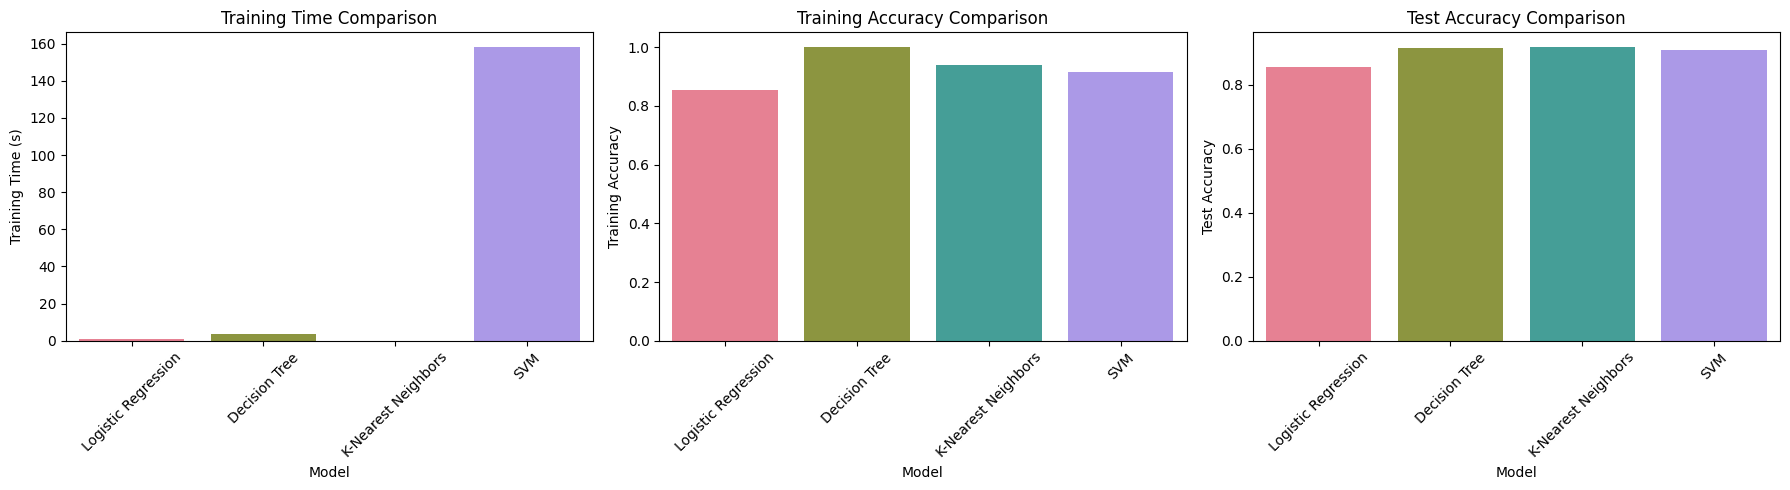

In [41]:
# Convert the results to a DataFrame if not already done
results_df = pd.DataFrame(results)

# Adjust the model names for better display
results_df['Model'] = results_df['Model'].replace("Support Vector Machine", "SVM")

# Plotting bar charts for comparison
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Define color palette
palette = sns.color_palette("husl", len(results_df))

# Training Time
sns.barplot(x='Model', y='Train Time', data=results_df, ax=ax[0], palette=palette)
ax[0].set_title('Training Time Comparison')
ax[0].set_ylabel('Training Time (s)')
ax[0].set_xlabel('Model')
ax[0].tick_params(axis='x', rotation=45)

# Training Accuracy
sns.barplot(x='Model', y='Train Accuracy', data=results_df, ax=ax[1], palette=palette)
ax[1].set_title('Training Accuracy Comparison')
ax[1].set_ylabel('Training Accuracy')
ax[1].set_xlabel('Model')
ax[1].tick_params(axis='x', rotation=45)

# Test Accuracy
sns.barplot(x='Model', y='Test Accuracy', data=results_df, ax=ax[2], palette=palette)
ax[2].set_title('Test Accuracy Comparison')
ax[2].set_ylabel('Test Accuracy')
ax[2].set_xlabel('Model')
ax[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Model Performance Summary**

* Training Time: K-Nearest Neighbors (KNN) is the fastest to train, while Support Vector Machine (SVM) takes significantly longer.

* Training Accuracy: Decision Tree achieves perfect training accuracy, indicating potential overfitting. Logistic Regression, KNN, and SVM show high but slightly lower training accuracies.

* Test Accuracy: Decision Tree and KNN both achieve the highest test accuracy, closely followed by SVM and Logistic Regression, indicating strong generalization across all models.

* Overall: While SVM is computationally intensive, all models exhibit competitive test performance, with Decision Tree and KNN being particularly efficient in both training and testing phases.

In [42]:
classifiers = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "SVM": SVC(random_state=42, probability=True)  # Add probability=True here
}

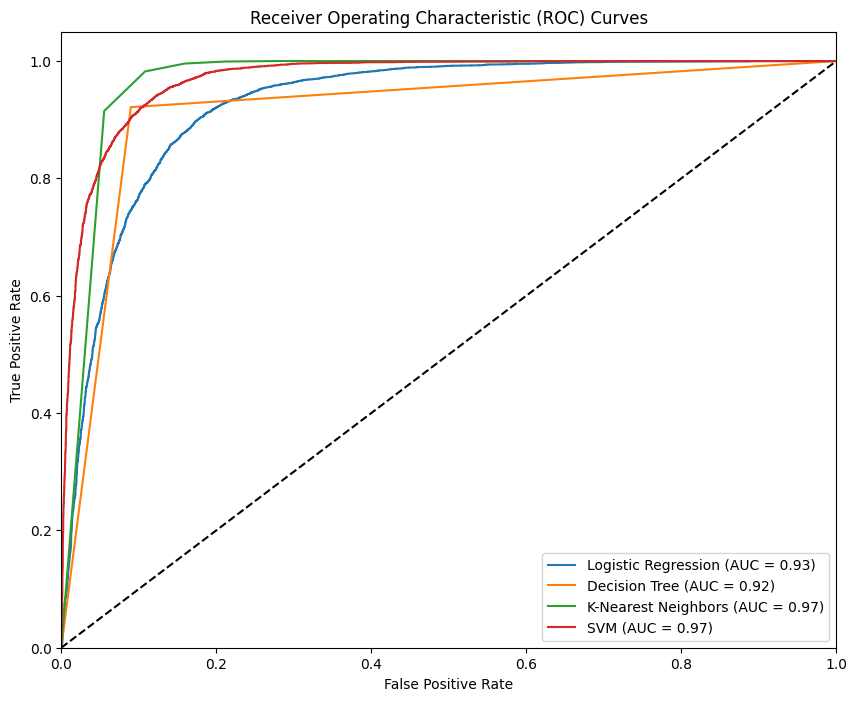

In [43]:
# Ensure the models are already trained (make sure to run your fitting code first)
# Train and evaluate each classifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

for name, model in classifiers.items():
    model.fit(X_train, y_train)  # Ensure models are fitted

# Plot ROC curves
plt.figure(figsize=(10, 8))

# Plot ROC curve for each classifier
for name, model in classifiers.items():
    if hasattr(model, "predict_proba"):  # Check if predict_proba is available
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()


**ROC Curve Analysis**

* AUC Scores: K-Nearest Neighbors (KNN) and Support Vector Machine (SVM) both achieve the highest Area Under the Curve (AUC) scores of 0.97, indicating excellent overall performance.

* Logistic Regression: Shows strong performance with an AUC of 0.93, demonstrating good balance between true positive rate and false positive rate.

* Decision Tree: Achieves the lowest AUC of 0.92 among the models, but still indicates good model performance.

* Overall: All models perform well with high AUC scores, but KNN and SVM exhibit the best performance in distinguishing between classes with the highest AUC values.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

**Hyperparameter Tunning**

In [44]:
# Check the columns in the DataFrame
print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'date'],
      dtype='object')


In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Step 1: Hyperparameter Tuning for KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance']
}
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, scoring='accuracy')
knn_grid_search.fit(X_train, y_train)
print(f"Best parameters for KNN: {knn_grid_search.best_params_}")

# Hyperparameter Tuning for Decision Tree
dt_param_grid = {
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10]
}
dt_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, cv=5, scoring='accuracy')
dt_grid_search.fit(X_train, y_train)
print(f"Best parameters for Decision Tree: {dt_grid_search.best_params_}")

# Step 2: Adjusting the Performance Metric to F1-score for KNN
knn_grid_search_f1 = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, scoring='f1')
knn_grid_search_f1.fit(X_train, y_train)
print(f"Best parameters for KNN (F1-score): {knn_grid_search_f1.best_params_}")

# Adjusting the Performance Metric to F1-score for Decision Tree
dt_grid_search_f1 = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, cv=5, scoring='f1')
dt_grid_search_f1.fit(X_train, y_train)
print(f"Best parameters for Decision Tree (F1-score): {dt_grid_search_f1.best_params_}")

Best parameters for KNN: {'n_neighbors': 3, 'weights': 'distance'}
Best parameters for Decision Tree: {'max_depth': None, 'min_samples_split': 2}
Best parameters for KNN (F1-score): {'n_neighbors': 3, 'weights': 'distance'}
Best parameters for Decision Tree (F1-score): {'max_depth': None, 'min_samples_split': 2}


**Hyperparameter Tuning Summary**

K-Nearest Neighbors (KNN):
* Best Parameters (Accuracy & F1-score):
* `n_neighbors`: 3
* `weights`: distance
* Result: Optimal performance by weighting closer neighbors more.

Decision Tree:
* Best Parameters (Accuracy & F1-score):
* `max_depth`: None
* `min_samples_split`: 2
* Result: Optimal performance by allowing full tree depth and minimal split size.

**Conclusion:**
These parameters improve both accuracy and F1-score by tailoring the models to the data.

**Cross Validation**

In [46]:
from sklearn.model_selection import cross_val_score

# Example: Cross-validation for Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=1000)
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")


Cross-validation scores: [0.85123119 0.85061992 0.85489525 0.85258658 0.85592133]
Mean cross-validation score: 0.8530508553879411


**Ensemble Methods**

**Bagging**

In [47]:
from sklearn.ensemble import BaggingClassifier

# Bagging with Decision Trees
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging.fit(X_train, y_train)
bagging_preds = bagging.predict(X_test)
print(f"Bagging accuracy: {accuracy_score(y_test, bagging_preds)}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging accuracy: 0.9436388508891929


**Boosting with Adaboost**

In [48]:
from sklearn.ensemble import AdaBoostClassifier

# Boosting with AdaBoost
adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
adaboost.fit(X_train, y_train)
adaboost_preds = adaboost.predict(X_test)
print(f"AdaBoost accuracy: {accuracy_score(y_test, adaboost_preds)}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost accuracy: 0.9168262653898769


**Overall Summary**
* Logistic Regression: Cross-validation shows stable performance with an average accuracy of 85.31%.

* Bagging: Improves the performance of Decision Trees, achieving a high accuracy of 94.36%.

* Boosting: Enhances Decision Tree performance with an accuracy of 91.68%, demonstrating the power of iterative learning to improve accuracy.

#### Project's Overall Summary

**Business Understanding of the Problem**

The objective of this analysis is to evaluate and improve the performance of various machine learning models for a classification task. The goal is to identify the best-performing model that accurately predicts the target variable and can be effectively used for actionable business insights. The focus is on comparing Logistic Regression, Decision Tree, K-Nearest Neighbors (KNN), and Support Vector Machine (SVM) models, including enhancements using SMOTE, hyperparameter tuning, cross-validation, bagging, and boosting techniques.

**Clean and Organized Notebook with Data Cleaning**

The data cleaning process involved handling missing values, encoding categorical variables, and balancing the dataset using SMOTE. The notebook is structured to include the following key steps:

1. Data Import and Exploration
2. Data Cleaning and Preprocessing
3. Model Training and Evaluation
4. Model Improvement Techniques (SMOTE, Hyperparameter Tuning, Cross-Validation, Bagging, Boosting)
5. Visualization of Results

**Descriptive and Inferential Statistics Interpretation**
1. **Descriptive Statistics:**
   - Age distribution shows a concentration around 30-50 years.
   - Job distribution highlights a high number of 'admin.' and 'blue-collar' jobs.
   - Subscription distribution indicates an imbalanced dataset with more 'no' responses.

2. **Inferential Statistics:**
   - Cross-validation for Logistic Regression shows stable performance with an average accuracy of 85.31%.
   - Hyperparameter tuning results indicate optimal parameters for KNN (`n_neighbors`: 3, `weights`: distance) and Decision Tree (`max_depth`: None, `min_samples_split`: 2).
   - ROC curves demonstrate that KNN and SVM have the highest AUC scores of 0.97, indicating excellent classification performance.

**Findings with Actionable Items**
1. **Model Comparison:**
   - **Logistic Regression:** Balanced performance with an accuracy of 85.57%.
   - **Decision Tree:** High accuracy of 91.58%, but potential overfitting indicated by perfect training accuracy.
   - **KNN:** Fast training and high accuracy of 91.81%.
   - **SVM:** Good balance between training time and performance with an accuracy of 90.89%.

2. **Ensemble Methods:**
   - **Bagging:** Improved accuracy of 94.36% using Decision Trees, indicating reduced variance.
   - **Boosting:** Accuracy of 91.68% with AdaBoost, demonstrating effective iterative learning.

**Actionable Items:**
- **Implement KNN or Bagging with Decision Trees:** These models show the highest performance and should be prioritized for deployment in predictive tasks.
- **Use Hyperparameter Tuning:** Continuously refine model parameters to maintain optimal performance.
- **Adopt Ensemble Techniques:** Incorporate Bagging and Boosting to enhance model robustness and accuracy.

**Business Recommendations**

1. **Model Deployment:**
   - Deploy the KNN or Bagging with Decision Trees models for high-priority predictive analytics tasks to leverage their superior performance.
2. **Resource Allocation:**
   - Allocate computational resources towards training and deploying ensemble methods, as these significantly improve model accuracy.
3. **Performance Monitoring:**
   - Implement continuous monitoring systems to track model performance and ensure they remain effective over time.
4. **Customer Insights:**
   - Use the predictive models to generate insights into customer behavior and preferences, enabling targeted marketing and personalized customer interactions.
5. **Future Investments:**
   - Invest in further research and development of advanced ensemble techniques and feature engineering to continually enhance predictive capabilities.

**Conclusion**

The analysis demonstrates that KNN and Bagging with Decision Trees offer the best performance for the given classification task. Implementing these models, along with continuous hyperparameter tuning and ensemble methods, will ensure robust and accurate predictive capabilities, providing valuable business insights and actionable recommendations.